Authored by: Avani Gupta <br>
    Roll: 2019121004

**Note: dataset shape is version dependent hence final answer too will be dependent of sklearn version installed on machine**

# Excercise: Eigen Face

Here, we will look into ability of PCA to perform dimensionality reduction on a set of Labeled Faces in the Wild dataset made available from scikit-learn. Our images will be of shape (62, 47). This problem is also famously known as the eigenface problem. Mathematically, we would like to find the principal components (or eigenvectors) of the covariance matrix of the set of face images. These eigenvectors are essentially a set of orthonormal features depicts the amount of variation between face images. When plotted, these eigenvectors are called eigenfaces.

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
from sklearn.datasets import fetch_lfw_people
import seaborn as sns; sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import sklearn
print(sklearn.__version__)

0.22.2.post1


#### Setup data

In [3]:
faces = fetch_lfw_people(min_faces_per_person=8)
X = faces.data
y = faces.target
print(faces.target_names)
print(faces.images.shape)

['Abdullah Gul' 'Adrien Brody' 'Al Gore' 'Alejandro Toledo' 'Ali Naimi'
 'Alvaro Uribe' 'Amelie Mauresmo' 'Ana Palacio' 'Andre Agassi'
 'Andy Roddick' 'Angelina Jolie' 'Ann Veneman' 'Anna Kournikova'
 'Antonio Palocci' 'Ari Fleischer' 'Ariel Sharon' 'Arnold Schwarzenegger'
 'Atal Bihari Vajpayee' 'Bill Clinton' 'Bill Frist' 'Bill Gates'
 'Bill Graham' 'Bill McBride' 'Bill Simon' 'Bob Hope' 'Britney Spears'
 'Carlos Menem' 'Carlos Moya' 'Catherine Zeta-Jones' 'Celine Dion'
 'Cesar Gaviria' 'Charles Moose' 'Charles Taylor' 'Colin Farrell'
 'Colin Powell' 'Condoleezza Rice' 'David Beckham' 'David Nalbandian'
 'Dick Cheney' 'Dominique de Villepin' 'Donald Rumsfeld' 'Edmund Stoiber'
 'Eduardo Duhalde' 'Fernando Gonzalez' 'Fernando Henrique Cardoso'
 'Fidel Castro' 'George Clooney' 'George HW Bush' 'George Robertson'
 'George W Bush' 'Gerhard Schroeder' 'Gerry Adams'
 'Gloria Macapagal Arroyo' 'Gonzalo Sanchez de Lozada' 'Gordon Brown'
 'Gray Davis' 'Guillermo Coria' 'Halle Berry' 'Hamid Kar

Note: **images num is version dependent** <br>
I get (4822, 62, 47) in my version of sklearn which is  0.22.2. <br>

Since our images is of the shape (62, 47), we unroll each image into a single row vector of shape (1, 4822). This means that we have 4822 features defining each image. These 4822 features will result into 4822 principal components in the PCA projection space. Therefore, each image location contributes more or less to each principal component.

#### Implement Eigen Faces

In [4]:
print(faces.images.shape)

(4822, 62, 47)


In [5]:
img_shape = faces.images.shape[1:]

In [6]:
print(img_shape)

(62, 47)


In [7]:
def FindEigen(X_mat):
    X_mat -= np.mean(X_mat, axis=0, keepdims=True)
    temp = np.matmul(X_mat.T, X_mat)
    cov_mat = 1/X_mat.shape[0]* temp
    eigvals, eigvecs = np.linalg.eig(cov_mat)
    ind = eigvals.argsort()[::-1]
    return np.real(eigvals[ind]), np.real(eigvecs[:, ind])

In [8]:
def plotFace(faces, h=10, v=1):
    fig, axes = plt.subplots(v, h, figsize=(10, 2.5),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(faces[i].reshape(*img_shape), cmap='gray')

In [9]:
def plotgraph(eigenvals):
    plt.plot(range(1, eigenvals.shape[0]+1), np.cumsum(eigenvals / np.sum(eigenvals)))
    plt.show()

In [10]:
def PrincipalComponentsNum(X, eigenvals, threshold=0.95):
    num = np.argmax(np.cumsum(eigenvals / np.sum(eigenvals)) >= threshold) + 1
    print(f"No. of principal components required to preserve {threshold*100} % variance is: {num}.")  

### Q1

How many principal components are required such that 95% of the vari-
ance in the data is preserved?

In [11]:
eigenvals, eigenvecs = FindEigen(X)

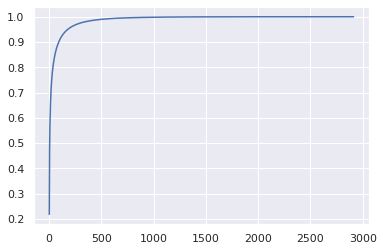

In [12]:
plotgraph(eigenvals)

In [13]:
PrincipalComponentsNum(X, eigenvals)

No. of principal components required to preserve 95.0 % variance is: 178.


### Q2

Show the reconstruction of the first 10 face images using only 100 principal
components.

In [14]:
def reconstructMat(X, eigvecs, num_c):
    return (np.matmul(X,np.matmul(eigvecs[:, :num_c], eigvecs[:, :num_c].T)))

original faces


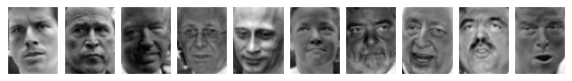

In [15]:
faceNum = 10
print('original faces')
plotFace(X[:faceNum, :], faceNum)

reconstructed faces using only 100 principal components


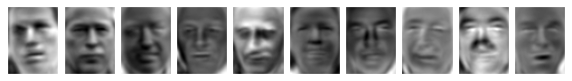

In [16]:
recFace = reconstructMat(X[:faceNum, :], eigenvecs, 100)
print('reconstructed faces using only 100 principal components')
plotFace(recFace, faceNum)

# Adding noise to images

We now add gaussian noise to the images. Will PCA be able to effectively perform dimensionality reduction? 

In [17]:
def plot_noisy_faces(noisy_faces):
    fig, axes = plt.subplots(2, 10, figsize=(10, 2.5),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(noisy_faces[i].reshape(62, 47), cmap='binary_r')

Below we plot first twenty noisy input face images.

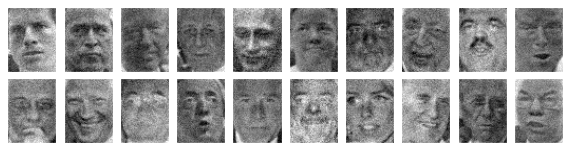

In [18]:
np.random.seed(42)
noisy_faces = np.random.normal(X, 15)
plot_noisy_faces(noisy_faces)

In [19]:
noisy_faces.shape

(4822, 2914)

In [20]:
noisy_eigenvals, noisy_eigenvecs = FindEigen(noisy_faces)

### Q3.1
Show the above two results for a noisy face dataset.
How many principal components are required such that 95% of the vari-
ance in the data is preserved?

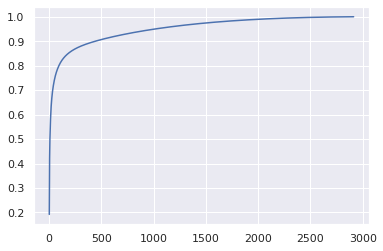

In [21]:
plotgraph(noisy_eigenvals)

In [22]:
PrincipalComponentsNum(noisy_faces, noisy_eigenvals, 0.95)

No. of principal components required to preserve 95.0 % variance is: 1014.


### Q3.2

Show the reconstruction of the first 10 face images using only 100 principal
components.

In [23]:
faces = 10
noisy_recons = reconstructMat(noisy_faces[:faces, :], noisy_eigenvecs, 100)

reconstructed faces for nosiy images only 100 principal components


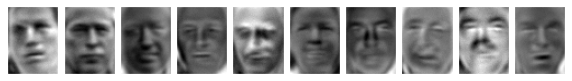

In [24]:
print('reconstructed faces for nosiy images only 100 principal components')
plotFace(noisy_recons, faces)